# Data Visualizations

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Bar Charts

In [3]:
# load the dataset
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


### Bar Chart by Seaborn

Syntax:
```
seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None)
```

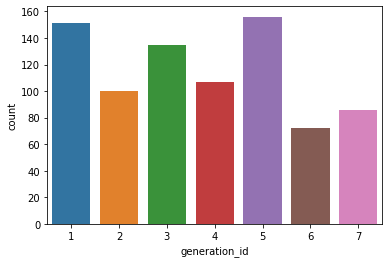

In [5]:
# make a default bar chart by generation_id
sb.countplot(data=pokemon, x='generation_id');

In [9]:
# the default color is distracting and not necessary
# we would like to pick a different color palette
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [10]:
# pick a blue color palette
base_color = sb.color_palette()[0]

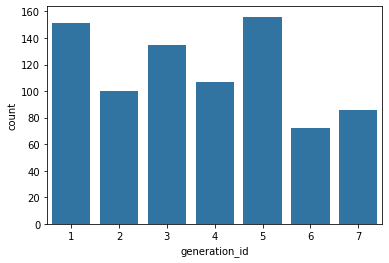

In [11]:
# set the base color, now much cleaner
sb.countplot(data=pokemon, x='generation_id', color=base_color);

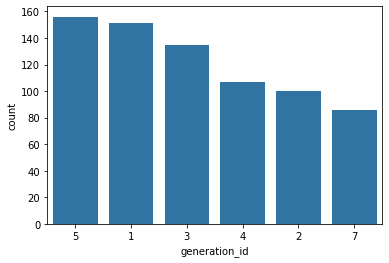

In [12]:
# sort the number of pokemon species done by order parameter
# hard-coded version
sb.countplot(data=pokemon, x='generation_id', color=base_color, 
             order=[5, 1, 3, 4, 2, 7]);

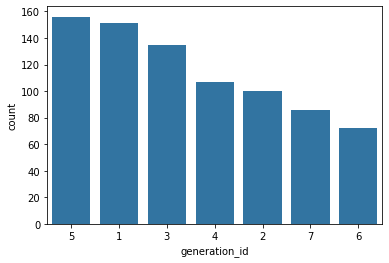

In [13]:
# cont. 
# programmatic version (better approach)
gen_order = pokemon.generation_id.value_counts().index
sb.countplot(data=pokemon, x='generation_id', color=base_color, 
             order=gen_order);

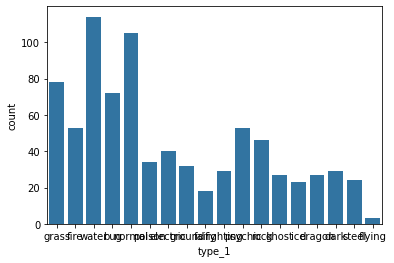

In [14]:
# make a default bar chart by type_1
# overlapping x labels
sb.countplot(data=pokemon, x='type_1', color=base_color);

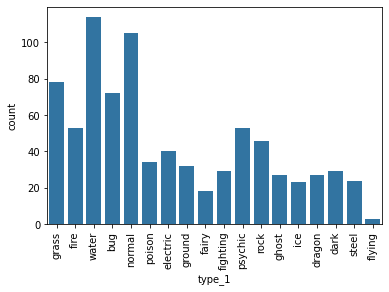

In [16]:
# to get around of it. We can:
# 1. rotate the x labels
sb.countplot(data=pokemon, x='type_1', color=base_color);
plt.xticks(rotation=90);

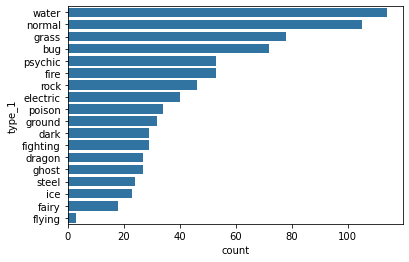

In [19]:
# 2. create a horizontal bar chart
# and sort by type frequency
type_order = pokemon.type_1.value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

### Bar Chart by Matplotlib

Syntax:
```
matplotlib.pyplot.bar(x, y, width=0.8, bottom=None, *, align='center', data=None)
```

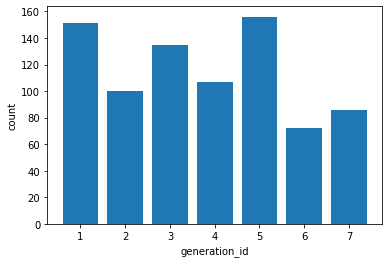

In [25]:
# return the Series having unique values
x = pokemon.generation_id.unique()

# return the Series having frequency count of each unique value
y = pokemon.generation_id.value_counts(sort=False)

# plot
plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count')

# Dsiplay the plot
plt.show()

### Absolute vs Relative Frequency

In [29]:
# take part of and reshape the pokemon dataframe
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                          value_vars=['type_1', 'type_2'],
                          var_name='type_level',
                          value_name='type')

# now some species have 2+ types, thus more than one rows
pkmn_types[pkmn_types.species == 'bulbasaur']

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
807,1,bulbasaur,type_2,poison


In [31]:
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [39]:
# plot the bar chart now
# Count the frequency of unique values 
# in the `type` column of pkmn_types dataframe. 
# by default, returns the decreasing order of the frequency
type_counts = pkmn_types.type.value_counts()

# Get the unique values of the `type` column, 
# in the decreasing order of the frequency.
type_order = type_counts.index

In [33]:
# show the type counts
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [51]:
type_counts.shape

(18,)

In [35]:
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'fire', 'ground', 'rock', 'fighting', 'electric', 'steel', 'fairy',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

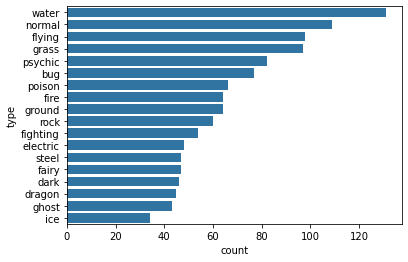

In [36]:
# make a horizontal bar chart with absolute counts
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

One method of plotting the data in terms of relative frequency on a bar chart is to just relabel the count's axis in terms of proportions. The underlying data will be the same, it will simply be the scale of the axis ticks that will be changed.

In [37]:
# find the max proportion of bar
# returns the sum of all non-null values in `type` column
n_pokemon = type_counts.sum()

# return the highest frequency in the `type` column
max_type_count = type_counts[0]

# return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


In [38]:
# Use numpy.arange() function to produce a set of evenly spaced 
# proportioned values between 0 and max_prop, with a step size 2%

tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

We need x-tick labels that must be evenly spaced on the x-axis. For this purpose, we must have a list of labels ready with us, before using it with `plt.xticks()` function.

In [48]:
# create a list of String values that can be used as tick labels.
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

#### The xticks and yticks functions: 
The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

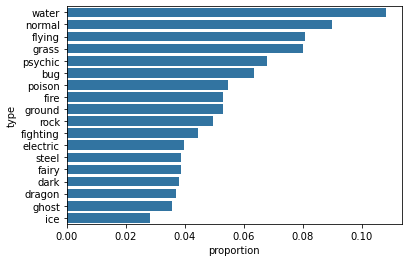

In [50]:
# make the charts with new x-tick labels
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Change the tick locations and labels
plt.xticks(ticks=tick_props * n_pokemon, labels=tick_names)
plt.xlabel('proportion');

#### Additional Variations

Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

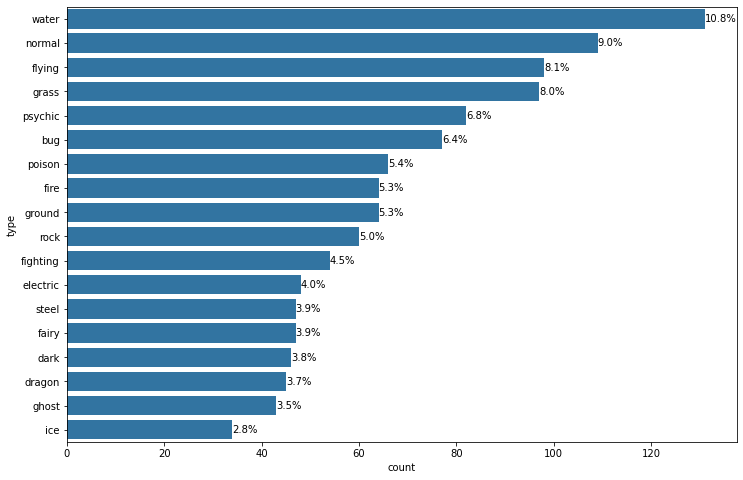

In [69]:
# print the text (proportion) on the bars of a horizontal plot

sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    
    # Remember, type_counts contains the frequency of unique values in 
    # the `type` column in decreasing order.
    count = type_counts[i]
    
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    
    # Print the string value on the bar
    plt.text(count, i, pct_string, va='center')
    
# change the figure size in inches
plt.rcParams['figure.figsize'] = 10, 12

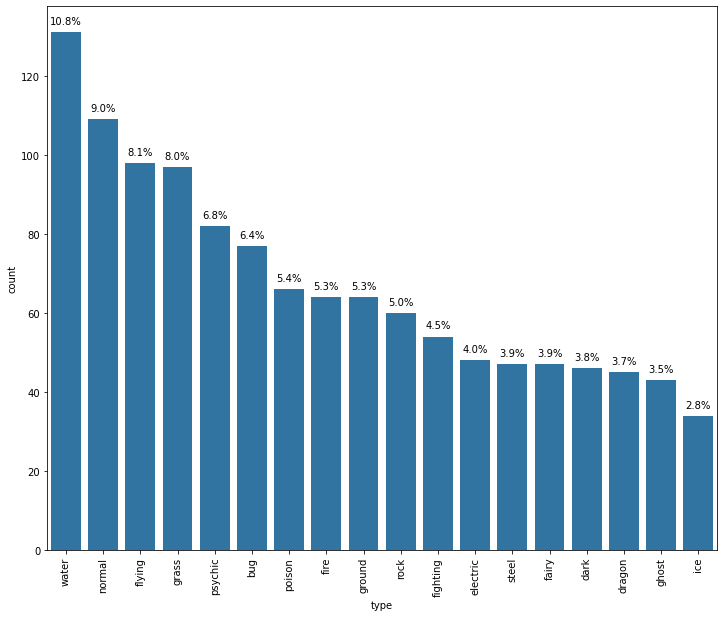

In [71]:
# Print the text (proportion) below the bars of a Vertical plot

sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);

# Recalculating the type_counts just to have clarity
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

# Specify the figure size in inches, for both X, and Y axes
plt.rcParams['figure.figsize'] = 12, 8